# ICCS 161 Project: Music and Mental Health Data Analysis and Modeling

Project by:
- Parit Vacharaskunee 6580209
- Makayla McGill 6680489

For class ICCS 161: Introduction to Data Science

Mahidol University International College

### References

- ***MAIN DATASET SOURCE***: https://www.kaggle.com/datasets/catherinerasgaitis/mxmh-survey-results
- https://towardsdatascience.com/top-machine-learning-algorithms-for-classification-2197870ff501

## Questions for Dataset Visualization and Analysis:
1. Visualization of Frequently Listened Genres and Mental Health
2. Which favorite genre of music makes people feel most depressed?
3. Top genres that promote positive feelings?
4. Does music tend to have a more positive effect on people age 20 & youner or 21 & older?

    4.1 Which genres promotes positive feelings for older people?
5. Do listening to foreign languages have any effects on individual's mental health?

## Import Libraries

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

### Getting CSV Files

Copy the absolute path of the csv file 'mxmh_survey_results.csv' and paste into the read_csv method.

In [44]:
df = pd.read_csv("./data/mxmh_survey_results.csv")
df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


## **Section 0**: Cleaning Data

<AxesSubplot:>

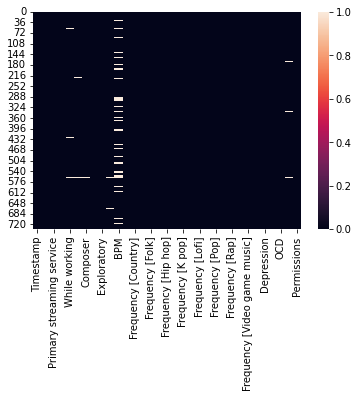

In [45]:
sns.heatmap(df.isnull())

Since some columns have no use to our questions/are missing too many, we decide to remove them.

In [46]:
mxmh = df.drop(['Timestamp', 'BPM', 'Permissions', 'Primary streaming service', 'Exploratory', 'Instrumentalist', 'Composer'], axis = 1)

In [47]:
mxmh.isnull().sum()

Age                             1
Hours per day                   0
While working                   3
Fav genre                       0
Foreign languages               4
Frequency [Classical]           0
Frequency [Country]             0
Frequency [EDM]                 0
Frequency [Folk]                0
Frequency [Gospel]              0
Frequency [Hip hop]             0
Frequency [Jazz]                0
Frequency [K pop]               0
Frequency [Latin]               0
Frequency [Lofi]                0
Frequency [Metal]               0
Frequency [Pop]                 0
Frequency [R&B]                 0
Frequency [Rap]                 0
Frequency [Rock]                0
Frequency [Video game music]    0
Anxiety                         0
Depression                      0
Insomnia                        0
OCD                             0
Music effects                   8
dtype: int64

We will fill in the missing age data with the mean age, and will backward fill the other missing data

AxesSubplot(0.125,0.125;0.62x0.755)


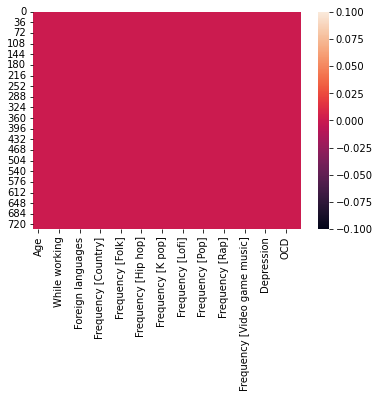

In [48]:
mxmh['Age'].replace([np.nan], int(mxmh['Age'].mean()), inplace = True)
mxmh = mxmh.fillna(method = 'backfill')
print(sns.heatmap(mxmh.isnull()))

In [49]:
mxmh.head()

,Age,Hours per day,While working,Fav genre,Foreign languages,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
0,18.0,3.0,Yes,Latin,Yes,Rarely,Never,Rarely,Never,Never,...,Very frequently,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,No effect
1,63.0,1.5,Yes,Rock,No,Sometimes,Never,Never,Rarely,Sometimes,...,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,No effect
2,18.0,4.0,No,Video game music,Yes,Never,Never,Very frequently,Never,Never,...,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect
3,61.0,2.5,Yes,Jazz,Yes,Sometimes,Never,Never,Rarely,Sometimes,...,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve
4,18.0,4.0,Yes,R&B,No,Never,Never,Rarely,Never,Rarely,...,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve


## **Section 1**: Observing, Analyzing, and Visualizing Data

### 1. Visualization of Frequently Listened Genres and Mental Health

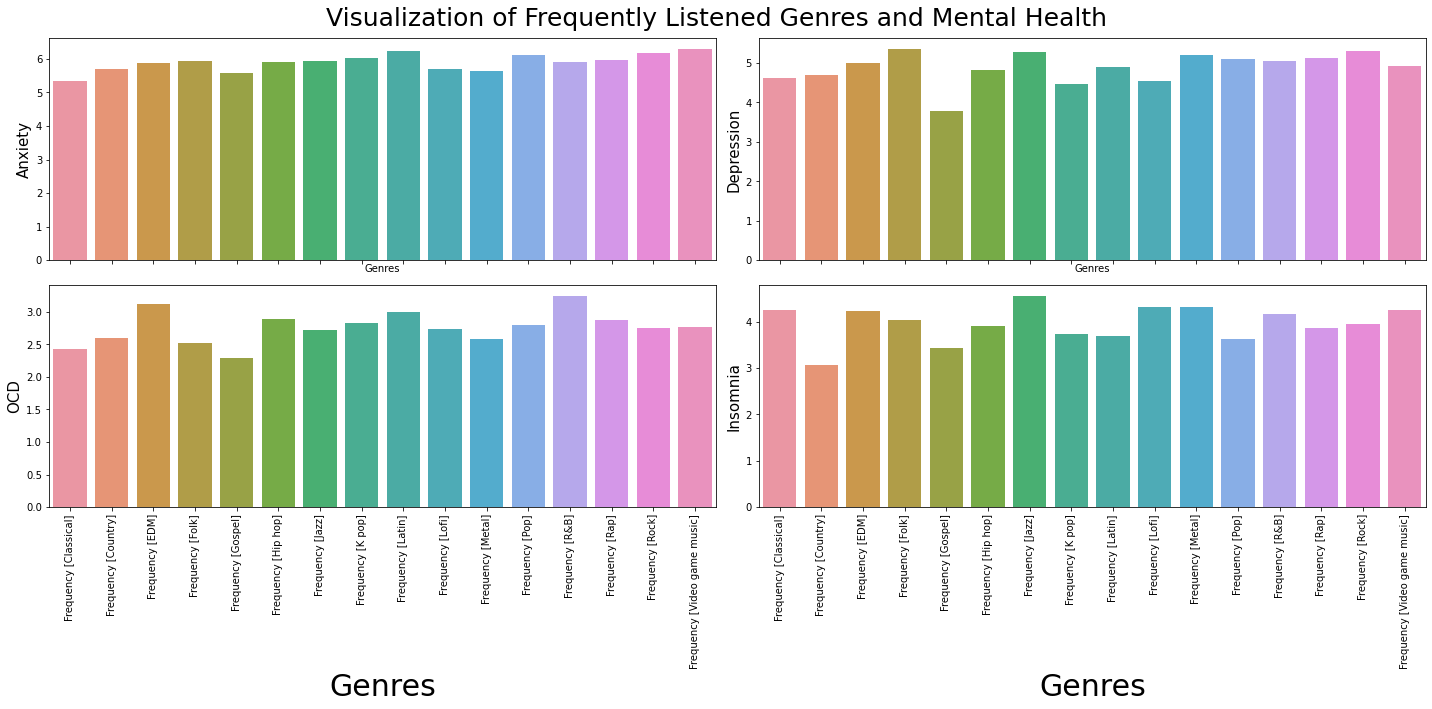

In [50]:
fig, axes = plt.subplots(2, 2, sharex = True, figsize = (20,10))
frequencies = mxmh.iloc[:, 5: 28]
# initializing dataframes for each mental health
scores1 = pd.DataFrame(columns = ['Genres', 'Anxiety'])
scores2 = pd.DataFrame(columns = ['Genres', 'Depression'])
scores3 = pd.DataFrame(columns = ['Genres', 'OCD'])
scores4 = pd.DataFrame(columns = ['Genres', 'Insomnia'])
# adding each genre's average value for each mental health 
for (column, columnData) in frequencies.items():
    mean = frequencies[frequencies[column].isin(['Very frequently'])]['Anxiety'].mean()
    temp = {'Genres': [column],
            'Anxiety': [mean]}
    temp_df = pd.DataFrame(temp)
    scores1 = pd.concat([scores1, temp_df])

for (column, columnData) in frequencies.items():
    mean = frequencies[frequencies[column].isin(['Very frequently'])]['Depression'].mean()
    temp = {'Genres': [column],
            'Depression': [mean]}
    temp_df = pd.DataFrame(temp)
    scores2 = pd.concat([scores2, temp_df])

for (column, columnData) in frequencies.items():
    mean = frequencies[frequencies[column].isin(['Very frequently'])]['OCD'].mean()
    temp = {'Genres': [column],
            'OCD': [mean]}
    temp_df = pd.DataFrame(temp)
    scores3 = pd.concat([scores3, temp_df])

for (column, columnData) in frequencies.items():
    mean = frequencies[frequencies[column].isin(['Very frequently'])]['Insomnia'].mean()
    temp = {'Genres': [column],
            'Insomnia': [mean]}
    temp_df = pd.DataFrame(temp)
    scores4 = pd.concat([scores4, temp_df])
# resetting index and dropping unecessary columns
scores1 = scores1.reset_index(drop = True)
scores1 = scores1.drop(index = [16, 17, 18, 19, 20], axis = 0)
scores2 = scores2.reset_index(drop = True)
scores2 = scores2.drop(index = [16, 17, 18, 19, 20], axis = 0)
scores3 = scores3.reset_index(drop = True)
scores3 = scores3.drop(index = [16, 17, 18, 19, 20], axis = 0)
scores4 = scores4.reset_index(drop = True)
scores4 = scores4.drop(index = [16, 17, 18, 19, 20], axis = 0)
# creating subplots
fig.suptitle("Visualization of Frequently Listened Genres and Mental Health", fontsize = 25)
sns.barplot(data = scores1, x = 'Genres', y = 'Anxiety', ax = axes[0, 0])
sns.barplot(data = scores2, x = 'Genres', y = 'Depression', ax = axes[0, 1])
sns.barplot(data = scores3, x = 'Genres', y = 'OCD', ax = axes[1, 0])
sns.barplot(data = scores4, x = 'Genres', y = 'Insomnia', ax = axes[1, 1])
axes[1, 1].tick_params(axis = 'x', rotation = 90)
axes[1, 0].tick_params(axis = 'x', rotation = 90)
axes[1, 1].set_xlabel("Genres", fontsize = 30)
axes[1, 0].set_xlabel("Genres", fontsize = 30)
axes[0, 0].set_ylabel("Anxiety", fontsize = 15)
axes[0, 1].set_ylabel("Depression", fontsize = 15)
axes[1, 0].set_ylabel("OCD", fontsize = 15)
axes[1, 1].set_ylabel("Insomnia", fontsize = 15)
plt.tight_layout()

#### 1.1 What is a person's anxiety levels based on how often they listen to rap music?

Text(0.5, 0, 'Frequency')

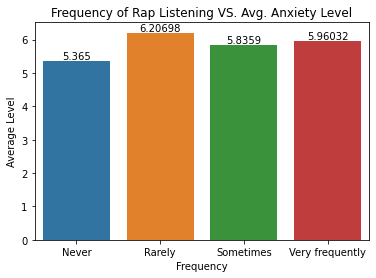

In [51]:
anx_never = mxmh.loc[mxmh.loc[:, 'Frequency [Rap]'] == 'Never']['Anxiety'].mean()
anx_rare = mxmh.loc[mxmh.loc[:, 'Frequency [Rap]'] == 'Rarely']['Anxiety'].mean()
anx_some = mxmh.loc[mxmh.loc[:, 'Frequency [Rap]'] == 'Sometimes']['Anxiety'].mean()
anx_freq = mxmh.loc[mxmh.loc[:, 'Frequency [Rap]'] == 'Very frequently']['Anxiety'].mean()

values = [anx_never, anx_rare, anx_some, anx_freq]
names = ['Never', 'Rarely', 'Sometimes', 'Very frequently']

ax = sns.barplot(x = names, y = values)
ax.bar_label(ax.containers[0]);
ax.set_title("Frequency of Rap Listening VS. Avg. Anxiety Level")
ax.set_ylabel("Average Level")
ax.set_xlabel("Frequency")

### 2. Which favorite genre of music makes people feel most depressed?

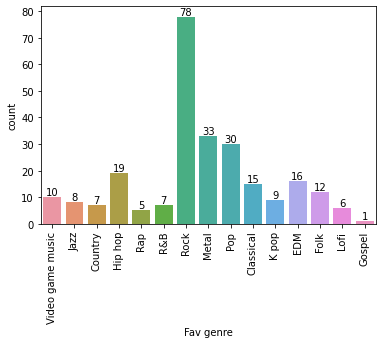

In [52]:
# finding values that depression level exceeds 6.
depressed = mxmh.loc[mxmh.loc[:, 'Depression'] > 6]
# plot against their favorite genre
ax = sns.countplot(data = depressed, x = 'Fav genre')
ax.tick_params(axis = 'x', rotation = 90)
ax.bar_label(ax.containers[0]);

### 3. What are the top genres that promote positive feelings?

In [53]:
isPos = pd.get_dummies(mxmh['Music effects'])
isPos = isPos.drop(['Worsen'], axis = 1)
isPos.rename(columns={True: "Is improved"})

,Improve,No effect
0,0,1
1,0,1
2,0,1
3,1,0
4,1,0
...,...,...
731,1,0
732,1,0
733,1,0
734,1,0


In [54]:
df2 = mxmh.copy()
df2 = pd.concat([df2, isPos], axis = 1)
df2 = df2.drop(['Music effects'], axis = 1)
df2.head(5)

,Age,Hours per day,While working,Fav genre,Foreign languages,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Improve,No effect
0,18.0,3.0,Yes,Latin,Yes,Rarely,Never,Rarely,Never,Never,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,0,1
1,63.0,1.5,Yes,Rock,No,Sometimes,Never,Never,Rarely,Sometimes,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,0,1
2,18.0,4.0,No,Video game music,Yes,Never,Never,Very frequently,Never,Never,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,0,1
3,61.0,2.5,Yes,Jazz,Yes,Sometimes,Never,Never,Rarely,Sometimes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,1,0
4,18.0,4.0,Yes,R&B,No,Never,Never,Rarely,Never,Rarely,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,1,0


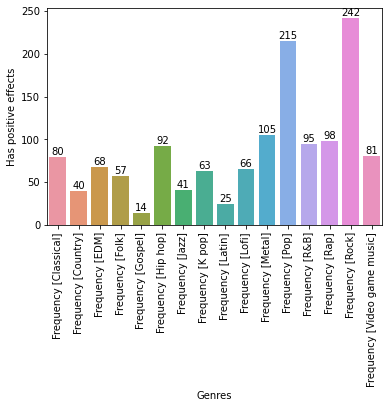

In [55]:
# creating temporary variables
temp = df2.iloc[:, 5: 21]
freq = temp[temp.iloc[:, :].isin(['Very frequently'])]
improve = df2.loc[:, 'Improve']
freq['Positive Effect'] = improve
# initializing dataframe
val = pd.DataFrame(columns = ['Genres', 'Has positive effects'])
sum = len(freq.loc[(freq.iloc[:, 0] == 'Very frequently') & (freq.loc[:, 'Positive Effect'] == 1)].index)
# adding counts to dataframe
for (column, columnData) in freq.items():
    count = len(freq.loc[(freq.loc[:, column] == 'Very frequently') & (freq.loc[:, 'Positive Effect'] == 1)].index)
    temp = {'Genres': column,
            'Has positive effects': count}
    temp_df = pd.DataFrame([temp])
    val = pd.concat([val, temp_df])
# graphing
val = val.reset_index(drop = True)
val = val.drop(index = [16], axis = 0)
ax = sns.barplot(data = val, x = 'Genres', y = 'Has positive effects')
ax.tick_params(axis = 'x', rotation = 90)
ax.bar_label(ax.containers[0]);

### 4. Does music tend to have a more positive effect on people 20 & younger or 21 & older?

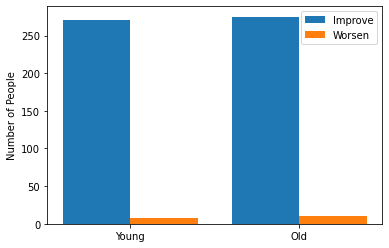

In [56]:
# getting number of people for each category
young_happy = len(df2.loc[(df2.loc[:, 'Age'] <= 20) & (df2.loc[:, 'Improve'] == 1)])
young_sad = len(df2.loc[(df2.loc[:, 'Age'] <= 20) & (df2.loc[:, 'Improve'] == 0) & (df2.loc[:, 'No effect'] == 0)])
old_happy = len(df2.loc[(df2.loc[:, 'Age'] > 20) & (df2.loc[:, 'Improve'] == 1)])
old_sad = len(df2.loc[(df2.loc[:, 'Age'] > 20) & (df2.loc[:, 'Improve'] == 0) & (df2.loc[:, 'No effect'] == 0)])
# plotting
values = [[young_happy, old_happy], [young_sad, old_sad]]
plt.bar(np.arange(2) - 0.2, values[0], 0.4, label = 'Improve') 
plt.bar(np.arange(2) + 0.2, values[1], 0.4, label = 'Worsen') 
plt.xticks(np.arange(2), ['Young', 'Old']) 
plt.ylabel('Number of People')    
plt.legend()
plt.show()

#### 4.1 Which genres promotes positive feelings for older people?

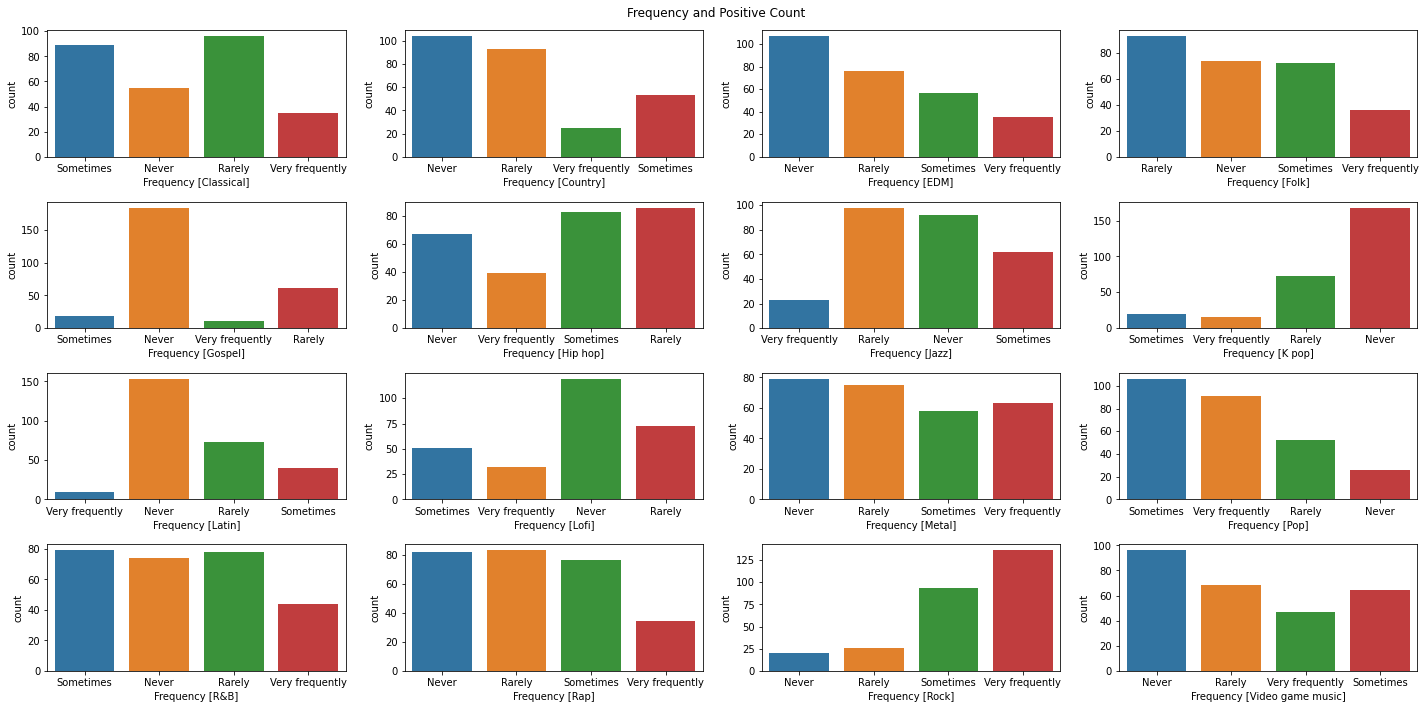

In [57]:
old_happy2 = df2.loc[(df2.loc[:, 'Age'] > 20) & (df2.loc[:, 'Improve'] == 1)]
old_happy2 = old_happy2.drop(columns = ['Age', 'Foreign languages', 'Hours per day', 'While working', 'Fav genre', 'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Improve', 'No effect'], axis = 1)

fig, axes = plt.subplots(4, 4)
fig.set_figwidth(20)
fig.set_figheight(10)
fig.suptitle("Frequency and Positive Count")

f = 0
a = 0

for (column, _) in old_happy2.items():
    ax = sns.countplot(data = old_happy2, x = column, ax = axes[f, a])
    # ax.tick_params(axis = 'x', rotation = 45)
    if a == 3:
        f += 1
        a = 0
    else:
        a += 1
fig.tight_layout()

### 5. Do listening to foreign languages have any effects on individual's mental health?

In [58]:
foreign = pd.get_dummies(mxmh['Foreign languages'])
foreign = foreign.drop('No', axis = 1)
foreign = foreign.rename(columns = {'Yes': 'Foreign Languages'})

In [59]:
mxmh = pd.concat([mxmh, foreign], axis = 1)
mxmh = mxmh.drop('Foreign languages', axis = 1)
mxmh

,Age,Hours per day,While working,Fav genre,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Foreign Languages
0,18.0,3.0,Yes,Latin,Rarely,Never,Rarely,Never,Never,Sometimes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,No effect,1
1,63.0,1.5,Yes,Rock,Sometimes,Never,Never,Rarely,Sometimes,Rarely,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,No effect,0
2,18.0,4.0,No,Video game music,Never,Never,Very frequently,Never,Never,Rarely,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,1
3,61.0,2.5,Yes,Jazz,Sometimes,Never,Never,Rarely,Sometimes,Never,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,1
4,18.0,4.0,Yes,R&B,Never,Never,Rarely,Never,Rarely,Very frequently,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,17.0,2.0,Yes,Rock,Very frequently,Rarely,Never,Sometimes,Never,Sometimes,...,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve,1
732,18.0,1.0,Yes,Pop,Rarely,Rarely,Never,Never,Never,Never,...,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve,1
733,19.0,6.0,Yes,Rap,Rarely,Sometimes,Sometimes,Rarely,Rarely,Very frequently,...,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve,0
734,19.0,5.0,Yes,Classical,Very frequently,Never,Never,Never,Never,Never,...,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve,0


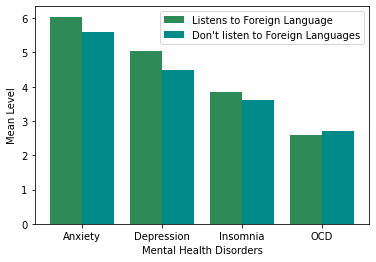

In [60]:
foreign_lvl = mxmh[['Anxiety', 'Depression', 'Insomnia', 'OCD', 'Foreign Languages']]
has_foreign = np.asanyarray(foreign_lvl.loc[foreign_lvl.loc[:, 'Foreign Languages'] == 1].drop(['Foreign Languages'], axis = 1).mean())
no_foreign = np.asanyarray(foreign_lvl.loc[foreign_lvl.loc[:, 'Foreign Languages'] == 0].drop(['Foreign Languages'], axis = 1).mean())

plt.bar(np.arange(4) - 0.2, has_foreign, 0.4, label = "Listens to Foreign Language", color = 'seagreen')
plt.bar(np.arange(4) + 0.2, no_foreign, 0.4, label = "Don't listen to Foreign Languages", color = 'darkcyan')
plt.xticks(np.arange(4), ['Anxiety', 'Depression', 'Insomnia', 'OCD'])
plt.xlabel('Mental Health Disorders')
plt.ylabel('Mean Level')
plt.legend()
plt.show()

## **Section 2**: Modeling

### 1. Logistic Regression

In [61]:
working = pd.get_dummies(mxmh['While working'], drop_first = True)
working = working.rename(columns = {'Yes': 'While Working'});

In [62]:
isPos = pd.get_dummies(mxmh['Music effects'])
isPos

,Improve,No effect,Worsen
0,0,1,0
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
731,1,0,0
732,1,0,0
733,1,0,0
734,1,0,0


In [63]:
mxmh = pd.concat([mxmh, isPos, working], axis = 1)
mxmh = mxmh.drop(['Music effects', 'While working', 'Fav genre'], axis = 1)
mxmh

,Age,Hours per day,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],...,Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Foreign Languages,Improve,No effect,Worsen,While Working
0,18.0,3.0,Rarely,Never,Rarely,Never,Never,Sometimes,Never,Very frequently,...,Sometimes,3.0,0.0,1.0,0.0,1,0,1,0,1
1,63.0,1.5,Sometimes,Never,Never,Rarely,Sometimes,Rarely,Very frequently,Rarely,...,Rarely,7.0,2.0,2.0,1.0,0,0,1,0,1
2,18.0,4.0,Never,Never,Very frequently,Never,Never,Rarely,Rarely,Very frequently,...,Very frequently,7.0,7.0,10.0,2.0,1,0,1,0,0
3,61.0,2.5,Sometimes,Never,Never,Rarely,Sometimes,Never,Very frequently,Sometimes,...,Never,9.0,7.0,3.0,3.0,1,1,0,0,1
4,18.0,4.0,Never,Never,Rarely,Never,Rarely,Very frequently,Never,Very frequently,...,Rarely,7.0,2.0,5.0,9.0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,17.0,2.0,Very frequently,Rarely,Never,Sometimes,Never,Sometimes,Rarely,Never,...,Never,7.0,6.0,0.0,9.0,1,1,0,0,1
732,18.0,1.0,Rarely,Rarely,Never,Never,Never,Never,Rarely,Never,...,Sometimes,3.0,2.0,2.0,5.0,1,1,0,0,1
733,19.0,6.0,Rarely,Sometimes,Sometimes,Rarely,Rarely,Very frequently,Rarely,Rarely,...,Rarely,2.0,2.0,2.0,2.0,0,1,0,0,1
734,19.0,5.0,Very frequently,Never,Never,Never,Never,Never,Rarely,Never,...,Sometimes,2.0,3.0,2.0,1.0,0,1,0,0,1


In [64]:
# replacing string's with numerical value that are equivalent
mxmh.replace('Never', 0, inplace = True)
mxmh.replace('Rarely', 1, inplace = True)
mxmh.replace('Sometimes', 2, inplace = True)
mxmh.replace('Very frequently', 3, inplace = True)

#### Split Values

In [65]:
x = mxmh.drop(['Improve', 'No effect', 'Worsen'], axis = 1)
y = mxmh['Improve']

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

#### Creating Model

In [67]:
lg = LogisticRegression(solver = 'lbfgs', max_iter = 1000)

In [68]:
lg.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [69]:
predictions = lg.predict(x_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[  4  42]
 [  7 131]]
              precision    recall  f1-score   support

           0       0.36      0.09      0.14        46
           1       0.76      0.95      0.84       138

    accuracy                           0.73       184
   macro avg       0.56      0.52      0.49       184
weighted avg       0.66      0.73      0.67       184



Result of true negative was good, but true positive was very low, so the overall model is not optimal

### 2. Random Forest

In [70]:
x = mxmh.drop(['Improve', 'No effect', 'Worsen'], axis = True)
y = mxmh[['Improve']]

In [92]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 161)

In [93]:
dct = DecisionTreeClassifier()
dct.fit(x_train, y_train)

DecisionTreeClassifier()

In [94]:
predictions = dct.predict(x_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[ 14  32]
 [ 30 108]]
              precision    recall  f1-score   support

           0       0.32      0.30      0.31        46
           1       0.77      0.78      0.78       138

    accuracy                           0.66       184
   macro avg       0.54      0.54      0.54       184
weighted avg       0.66      0.66      0.66       184



True positive was still low, so this model was not able to predict the positive effects from given data. Possible conclusion: mental health are not associate with genres of music, and there are more factors that could affect mental health.